<a href="https://colab.research.google.com/github/Raisler/DataScience_Portfolio/blob/master/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de Aprendizado de Máquina

Autor: Raisler Voigt

# Carregamento dos dados

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [7]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Limpeza dos dados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Outliers

O max de Pregnancies & Insulin teve um gap muito grande do terceiro quartil em relação a progressão que estava se formando, mas será melhor visualizar todos os dados através de um boxplot.

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


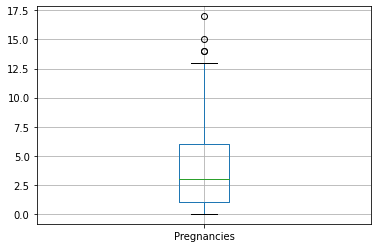

In [11]:
df[['Pregnancies']].boxplot()

In [12]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

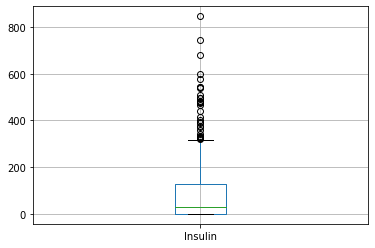

In [13]:
df[['Insulin']].boxplot()

In [14]:
df['Insulin'].value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [15]:
df[df.duplicated() == True]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## Sobre os Outliers
Como os valores estão bem dispersos, não foi encontrado nenhuma forma de retirar alguns valores, já que o conhecimento médico do autor é extremamente escasso, então foi decidido deixar todas as variáveis ali.

# Preparação dos dados

É Uma boa prática normalizar os dados, e nesta fase, além da normalização, iremos separar os daodos em treino e teste e ver o balanceamento de classes(caso uma sobreponha demais a outra)

## Balanceamento de classes

Para evitar que uma classe tenha maior probabilidade do que outra de aparecer, colocaremos as duas classes em pé de igualdade fazendo de forma aleatória que a classe 1 chegue ao mesmo número de datapoints da classe 0, será adicionados dados repetidos dos que já existem

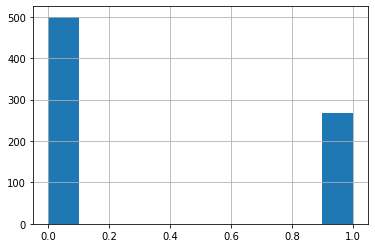

In [16]:
df.Outcome.hist()

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [18]:
features = np.array(df.drop(columns = ['Outcome']))
target = np.array(df['Outcome'])
display(features, target)

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [19]:
# Scaler
scale = StandardScaler().fit(features)
features = scale.transform(features)
features

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Treino e teste

Levando em consideração o número pequeno de dados, 20% de dados para teste foi o escolhido.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
                                          features,target,
                                          test_size = 0.15, random_state = 42
                                          )

## Balanceamento dos dados

A estratégia 'minority' significa que entre duas classes, se a classe majoritária possui 100 exemplos e a minoriária possui 30, então a classe minoritária passará a ter 100 também, igualando-se a majoritária.

In [21]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [22]:
print(Counter(y_train))

Counter({1: 424, 0: 424})


# Treinamento dos dados

Sabe-se que Árvore de decisão em classificação é um algoritmo simples, e usaremos ele como baseline, mas as vezes o simples é suficiente e até melhor.

  A regressão logistíca é um ótimo classificador para problemas binários e usaremos ela como comparação e principal algoritmo da escolha dos autores.

In [23]:
# Instanciando modelos

LR = LogisticRegression(solver = 'liblinear', random_state=42, max_iter=1000)
DT = DecisionTreeClassifier()

In [24]:
model1 = DT.fit(X_train, y_train)
model2 = LR.fit(X_train, y_train)

In [25]:
display(model1, model2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluation | Avaliação


O mais importante é prever quem tem diabetes, se o modelo for muito bom em prever quem não tem e o mesmo na realidade tiver a doença, então será um grande risco.

Então qual métrica é melhor?
A melhor métrica para avaliarmos/maximizar é o Recall, ele é o melhor para minizar os falsos negativos, que basicamente é ter em um modelo generalizado previsões de pessoas que talvez nem tenham diabete mas mesmo assim ele diagnostica para não correr o risco de deixar alguém com diabete pensar que não está doente.

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [27]:
predicts_model1 = model1.predict(X_test)
predicts_model2 = model2.predict(X_test)

In [28]:
evaluate_model1 =  classification_report(y_test, predicts_model1)

print('Classification metrics model1: \n', evaluate_model1)

Classification metrics model1: 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        76
           1       0.57      0.57      0.57        40

    accuracy                           0.71       116
   macro avg       0.68      0.68      0.68       116
weighted avg       0.71      0.71      0.71       116



In [29]:
evaluate_model2 =  classification_report(y_test, predicts_model2)
print('Classification metrics model2: \n', evaluate_model2)

Classification metrics model2: 
               precision    recall  f1-score   support

           0       0.85      0.68      0.76        76
           1       0.56      0.78      0.65        40

    accuracy                           0.72       116
   macro avg       0.71      0.73      0.71       116
weighted avg       0.75      0.72      0.72       116



# CONLUSÃO

A acurácia foi parecida entre os modelos com sua diferença de aproximadamente 1, mas se tratando em diagnosticar quem está com Diabete, a Regressão Logistica se saiu melhor com o recall maximizado para a classe 1, ou seja, ele tem mais chance de prever 1 sendo a classe real 0, do que prever 0 sendo a classe real 1.

Entretando, a acurácia foi de apenas 71%, o que é consideralvemente baixo principalmente por se tratar de um problema na área da sáude, algumas possíveis soluções seria:
 * ter um dataset maior;
 * diminuir o número de features;
 * Excluir possíveis datapoints que são outliers